In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:

data = "/content/social_ads.csv"
df = pd.read_csv(data)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Data Description
This dataset contains information about individuals and their response to a particular advertisement campaign on social media. The dataset includes the following columns:

Age: Age of the individual in years.
EstimatedSalary: Estimated salary of the individual.
Purchased: Binary variable indicating whether the individual made a purchase (1) or not (0) after seeing the advertisement.
Column Descriptions
i. Age:

Data Type: Integer
Description: Represents the age of the individual in years.

ii. EstimatedSalary:

Data Type: Integer
Description: Indicates the estimated salary of the individual.

iii. Purchased:

Data Type: Integer (0 or 1)
Description: Indicates whether the individual made a purchase (1) or not (0) after seeing the advertisement.



In [ ]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df.shape

(400, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

In [ ]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:

# Prediction
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 87.5


In [ ]:

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[48  6]
 [ 4 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.79      0.85      0.81        26

    accuracy                           0.88        80
   macro avg       0.85      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7857142857142857
Recall: 0.8461538461538461
F1-score: 0.8148148148148148


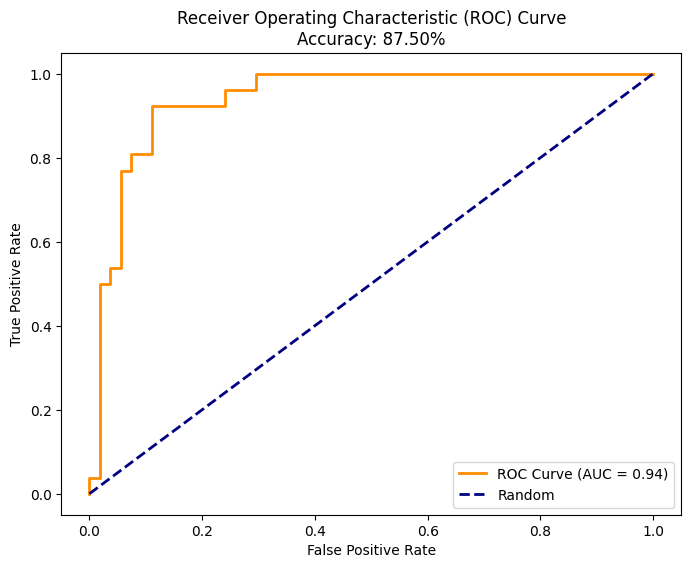

In [ ]:

# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    acc * 100))
plt.legend(loc="lower right")
plt.show()

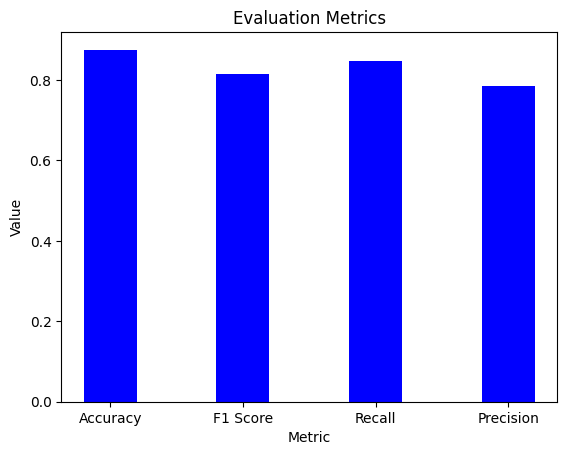

In [ ]:


# Create a list of metrics
metrics = ["Accuracy", "F1 Score", "Recall", "Precision"]

# Create a list of values
values = [acc, f1, recall, precision]

# Create a bar chart
plt.bar(metrics, values, color='blue', width=0.4)

# Add title and axis labels
plt.title("Evaluation Metrics")
plt.xlabel("Metric")
plt.ylabel("Value")

# Show the plot
plt.show()


                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


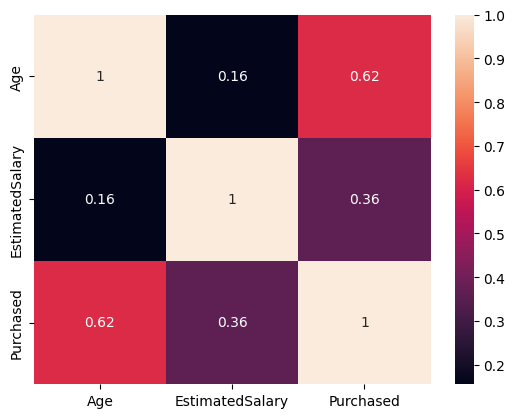

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


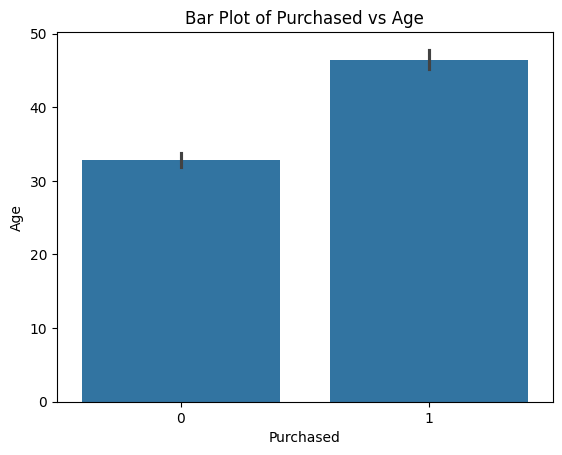

In [ ]:

# Bar plot of Purchased vs Age
sns.barplot(x='Purchased', y='Age', data=df)
plt.xlabel('Purchased')
plt.ylabel('Age')
plt.title('Bar Plot of Purchased vs Age')
plt.show()




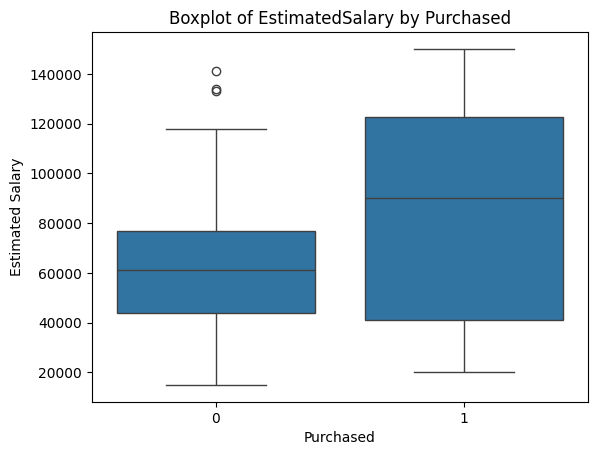

In [ ]:
# Boxplot of EstimatedSalary by Purchased
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df)
plt.xlabel('Purchased')
plt.ylabel('Estimated Salary')
plt.title('Boxplot of EstimatedSalary by Purchased')
plt.show()


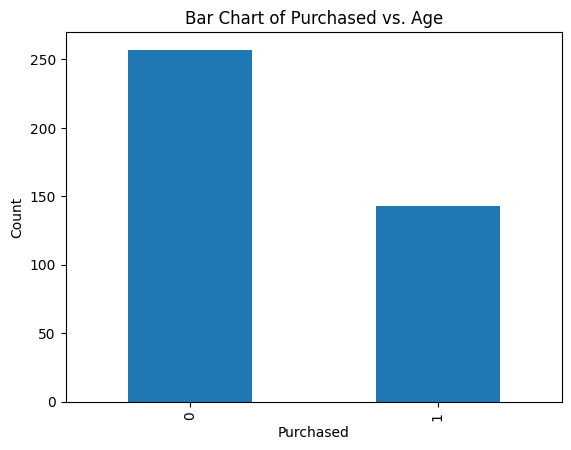

In [ ]:

# Create a bar chart of Purchased vs. Age
df['Purchased'].value_counts().plot(kind='bar')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.title('Bar Chart of Purchased vs. Age')
plt.show()


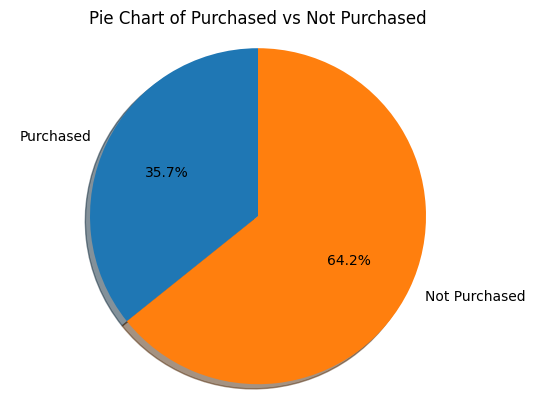

In [ ]:

# Pie chart of purchased vs not purchased
labels = ['Purchased', 'Not Purchased']
sizes = [df['Purchased'].value_counts()[1], df['Purchased'].value_counts()[0]]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Pie Chart of Purchased vs Not Purchased')
plt.show()



**Summary:**

This project aimed to analyze a dataset containing information about individuals and their response to a social media advertisement campaign. The dataset included features such as age, estimated salary, and whether or not the individual made a purchase after seeing the advertisement.

**Data Exploration and Preparation:**

1. The data was loaded into a Pandas DataFrame using `pd.read_csv`.
2. The data was explored using various methods such as `head()`, `shape`, `info()`, `describe()`, and `isnull().sum()` to understand the structure, content, and any missing values.
3. The data was split into training and testing sets using `train_test_split` to prepare for model training and evaluation.
4. Feature scaling was performed using `StandardScaler` to standardize the features and improve model performance.

**Model Training and Evaluation:**

1. A Logistic Regression model was trained on the training data using `LogisticRegression`.
2. The model was used to predict the purchase behavior of individuals in the testing set using `model.predict`.
3. The model's accuracy was evaluated using `accuracy_score`, and the results were printed.
4. A classification report and confusion matrix were generated using `classification_report` and `confusion_matrix` to further assess the model's performance.
5. The ROC curve and AUC were plotted using `roc_curve` and `auc` to visualize the model's ability to distinguish between different classes.

**Additional Analysis:**

1. A bar chart was created to visualize the accuracy, F1 score, recall, and precision of the model.
2. The correlation matrix was calculated and displayed using `df.corr()` and `sns.heatmap` to identify relationships between features.
3. Bar plots and boxplots were created to visualize the relationship between purchase behavior and age and estimated salary.
4. A pie chart was created to depict the proportion of individuals who made a purchase versus those who did not.

**Conclusion:**

The analysis successfully evaluated the effectiveness of the social media advertisement campaign by analyzing the provided dataset. The Logistic Regression model achieved an accuracy of 87.50%. Further insights were obtained through data visualization and correlation analysis, providing a comprehensive understanding of the factors influencing purchase behavior.